In [8]:
import pandas as pd

without_ess = pd.read_csv("./RandomGen/OptimalSizing/without_ess_init.csv")
with_ess = pd.read_csv("./RandomGen/OptimalSizing/with_ess_init.csv")
with_ess

,SolarOut,WindOut,Ess,ElectricGridBuy,ElectricGridSell,EssChg,EssDischg,Load,ElectricAbun
0,0.000,98.3695,662.854,0.000,646.503,0.0,1657.130,1109,0
1,0.000,126.6890,662.854,1043.310,0.000,0.0,0.000,1170,0
2,0.000,237.5020,662.854,926.498,0.000,0.0,0.000,1164,0
3,0.000,409.5390,662.854,729.461,0.000,0.0,0.000,1139,0
4,135.134,489.3750,662.854,511.491,0.000,0.0,0.000,1136,0
...,...,...,...,...,...,...,...,...,...
8755,0.000,349.7890,2889.340,0.000,0.000,0.0,1516.210,1866,0
8756,0.000,319.8670,1442.890,0.000,0.000,0.0,1374.130,1694,0
8757,0.000,314.9640,662.854,503.002,0.000,0.0,741.034,1559,0
8758,0.000,264.9190,662.854,1214.080,0.000,0.0,0.000,1479,0


In [2]:
with_ess.columns

Index(['SolarOut', 'WindOut', 'Ess', 'ElectricGridBuy', 'ElectricGridSell',
       'EssChg', 'EssDischg', 'Load', 'ElectricAbun'],
      dtype='object')

In [ ]:
#function to plot the import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, replace it with your DataFrame variable
df = with_ess.copy()

# Define the columns you want to plot
columns_to_plot = ['SolarOut', 'WindOut', 'ElectricGridBuy', 'ElectricGridSell', 'EssChg', 'EssDischg']

# Create a new DataFrame with only the selected columns
df_plot = df[columns_to_plot]

# Make grid sell and battery discharge negative
df_plot['ElectricGridSell'] = -df_plot['ElectricGridSell']
df_plot['EssChg'] = -df_plot['EssChg']


# Create a stacked bar plot
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Create a line plot for 'Load'
df['Load'].plot(ax=ax, marker='o',color='r', linestyle='--',markersize=10, secondary_y=False)

# Customize the plot

ax.set_xlabel('Time(h)')
ax.set_ylabel('Power(KWh)')
plt.title('24 hour optimal operation with ESS')
plt.savefig("with_Ess.png")
plt.show()


C:\Users\talha\AppData\Local\Temp\ipykernel_15152\3027407759.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['ElectricGridSell'] = -df_plot['ElectricGridSell']
C:\Users\talha\AppData\Local\Temp\ipykernel_15152\3027407759.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['EssChg'] = -df_plot['EssChg']


Autumn


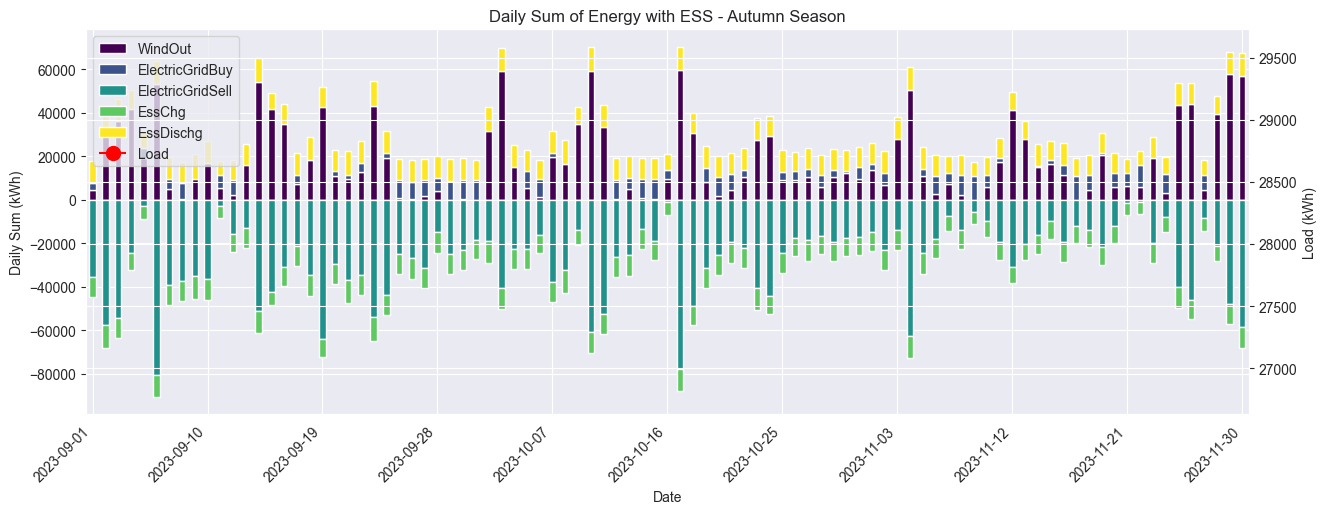

Spring


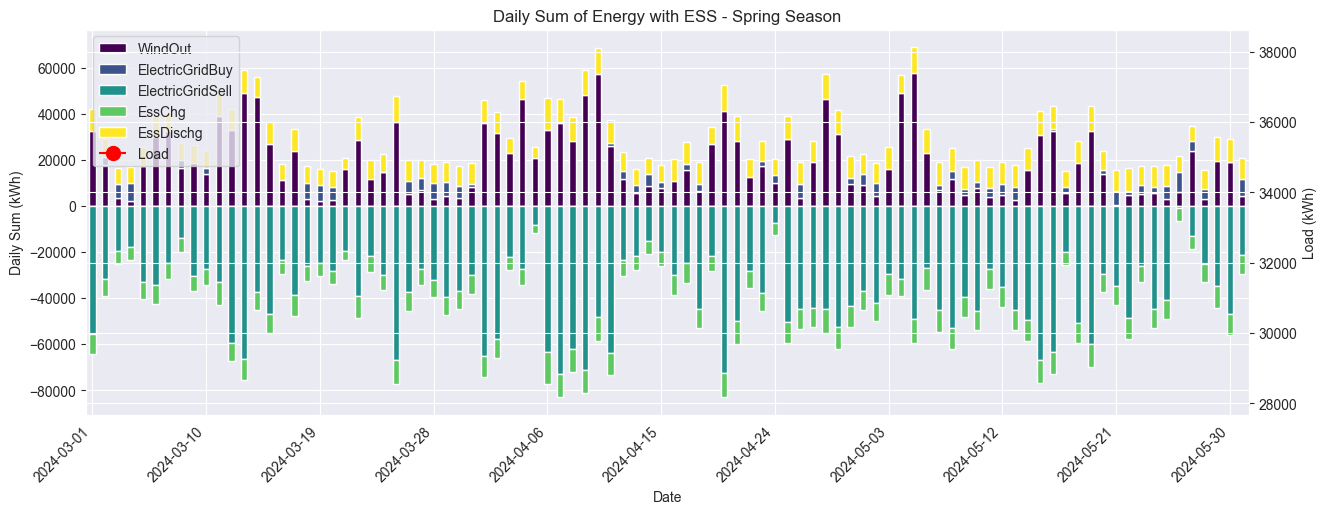

Summer


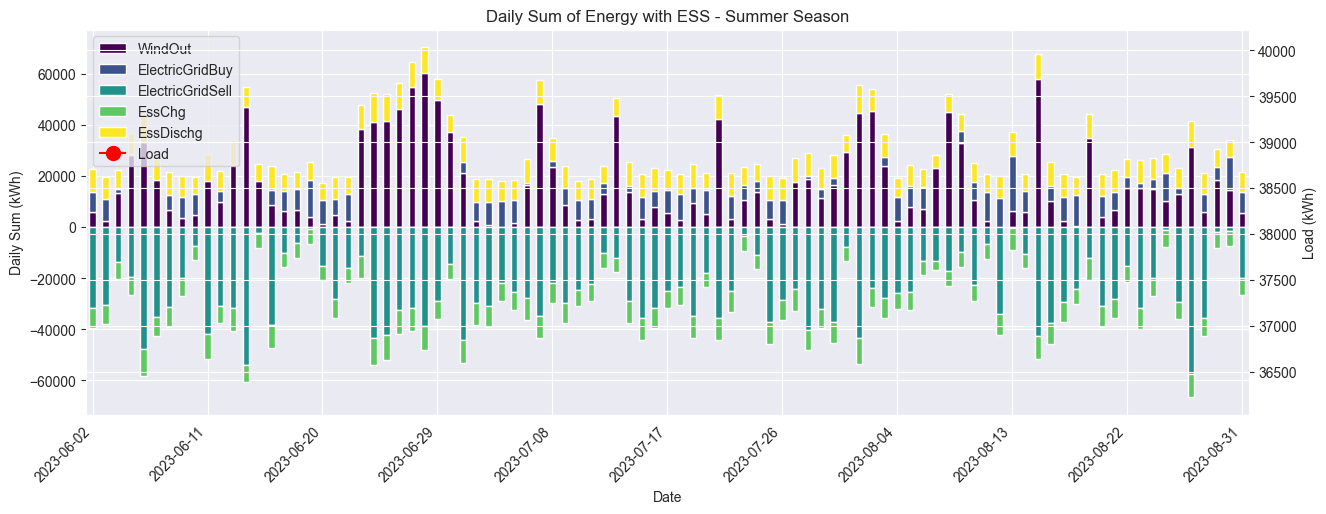

Winter


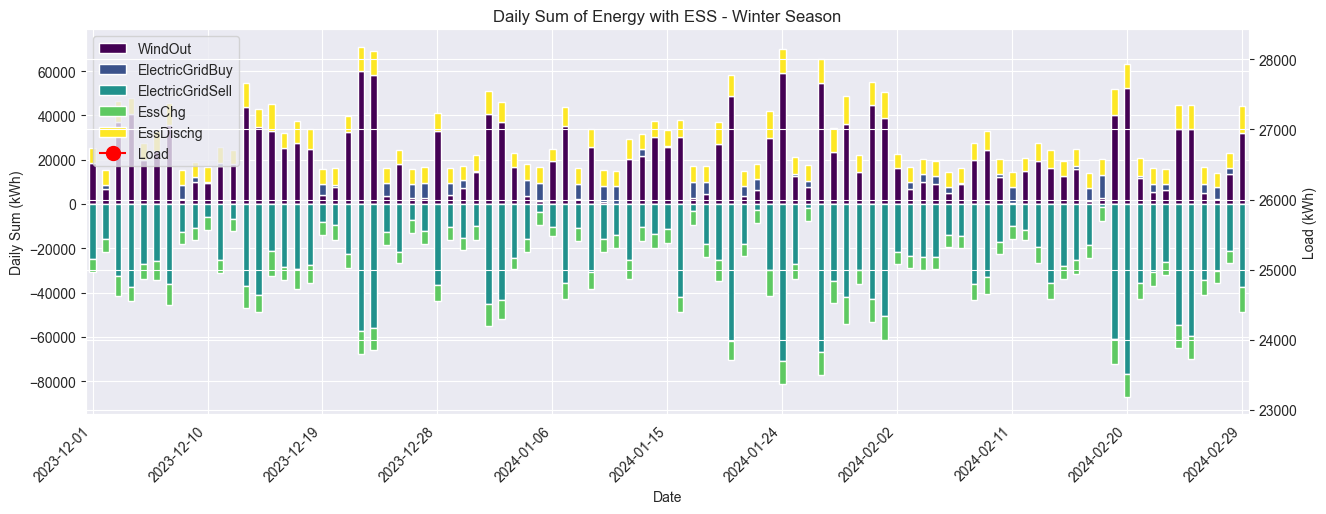

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df = with_ess.copy()

# Assuming df has a datetime index
df['DateTime'] = pd.to_datetime('2023-06-02') + pd.to_timedelta(df.index, unit='h')
# Define the columns you want to plot
columns_to_plot = ['SolarOut', 'WindOut', 'ElectricGridBuy', 'ElectricGridSell', 'EssChg', 'EssDischg']

# Sum all columns over the daily period
df_daily_sum = df.groupby(df['DateTime'].dt.date)[columns_to_plot].sum().reset_index()

df_daily_sum['EssChg'] = -df_daily_sum['EssChg']
df_daily_sum['ElectricGridSell'] = -df_daily_sum['ElectricGridSell']
df_daily_sum['DateTime'] = pd.to_datetime(df_daily_sum['DateTime'])
df_daily_sum['Season'] = df_daily_sum['DateTime'].apply(lambda x: get_season(x.month))

# Group by season
season_groups = df_daily_sum.groupby('Season')

# Iterate over seasons and plot
for season, data in season_groups:
    print(season)
    fig, ax = plt.subplots(figsize=(15, 5))
    
    # Plot other columns
    data.plot(x='DateTime', y=columns_to_plot[1:], kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Create a twin axis for 'Load'
    ax2 = ax.twinx()
    
    # Plot 'Load' on the twin axis
    load_data = df.groupby(df['DateTime'].dt.date)['Load'].sum().loc[data['DateTime'].dt.date.unique()]
    load_dates = load_data.index  # Use the correct index
    ax2.plot(load_dates, load_data, marker='o', color='r', linestyle='--', markersize=10, label='Load')

    # Customize the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Sum (kWh)')
    ax2.set_ylabel('Load (kWh)')
    plt.title(f'Daily Sum of Energy with ESS - {season} Season')
    
    # Legends
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper left')
    
    # Change the tick labels to numeric values and skip some
    skip_factor = max(len(data['DateTime']) // 10, 1)
    tick_positions = range(0, len(data['DateTime']), skip_factor)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(data['DateTime'][::skip_factor].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')
    
    # Save and show the plot
    plt.savefig(f"with_Ess_{season}_season_daily_sum.png")
    plt.show()


DateTime
2023-12-01    23183
2023-12-02    23183
2023-12-03    23183
2023-12-04    23183
2023-12-05    23183
              ...  
2024-02-25    23183
2024-02-26    23183
2024-02-27    23183
2024-02-28    23183
2024-02-29    28177
Name: Load, Length: 91, dtype: int64

   Carbon Penalty  Objective  Emission      LCOE
0              10  1813810.0  24293.20  0.173505
1              20  2002640.0  14625.60  0.139569
2              30  2125360.0  10406.80  0.121660
3              40  2214650.0   7528.40  0.110972
4              50  2277480.0   5085.94  0.101071
5              60  2321550.0   3819.59  0.096908
6              70  2355170.0   3015.57  0.093473
7              80  2382370.0   2311.00  0.090640
8              90  2403260.0   1879.78  0.088333
9             100  2420280.0   1480.27  0.085377


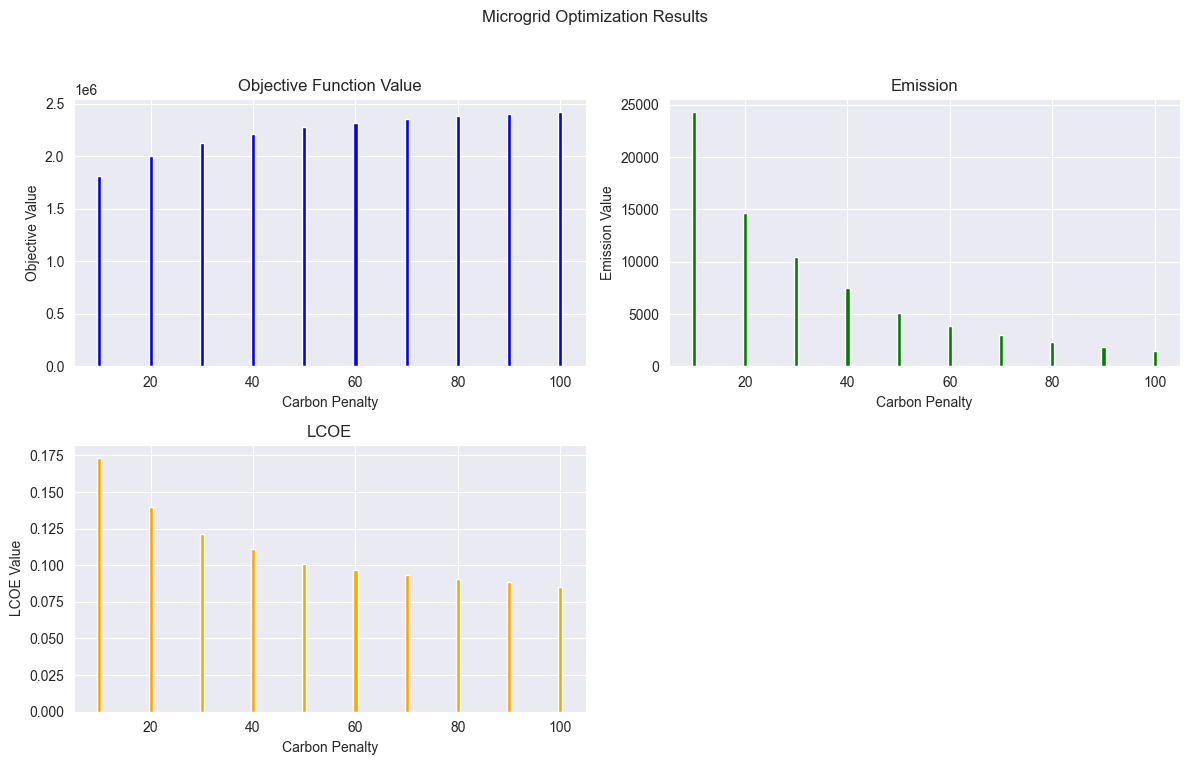

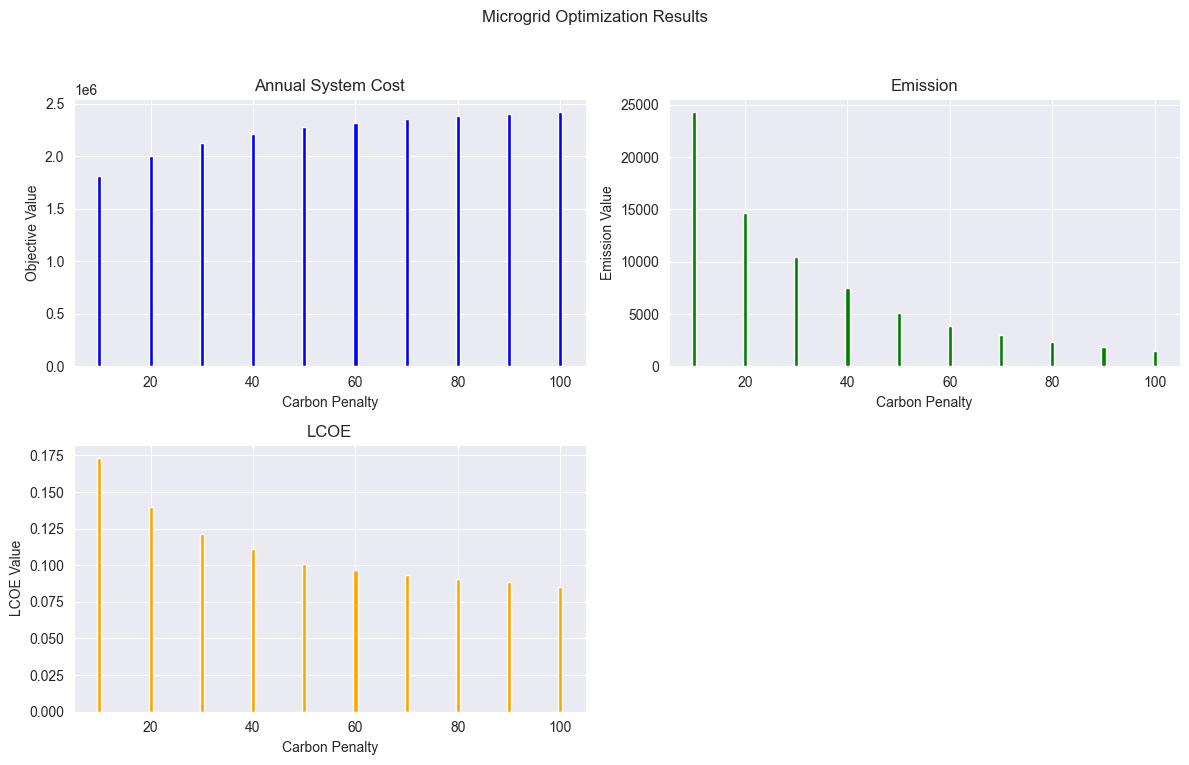

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually created data
data = {
    'Carbon Penalty': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Objective': [1.81381e+06, 2.00264e+06, 2.12536e+06, 2.21465e+06, 2.27748e+06, 2.32155e+06, 2.35517e+06, 2.38237e+06, 2.40326e+06, 2.42028e+06],
    'Emission': [24293.2, 14625.6, 10406.8, 7528.4, 5085.94, 3819.59, 3015.57, 2311, 1879.78, 1480.27],
    'LCOE': [0.173505, 0.139569, 0.12166, 0.110972, 0.101071, 0.0969082, 0.0934728, 0.0906402, 0.0883328, 0.0853769]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Microgrid Optimization Results')

# Subplot 1: Objective
axes[0, 0].bar(df['Carbon Penalty'], df['Objective'], color='blue')
axes[0, 0].set_title('Objective Function Value')
axes[0, 0].set_xlabel('Carbon Penalty')
axes[0, 0].set_ylabel('Objective Value')

# Subplot 2: Emission
axes[0, 1].bar(df['Carbon Penalty'], df['Emission'], color='green')
axes[0, 1].set_title('Emission')
axes[0, 1].set_xlabel('Carbon Penalty')
axes[0, 1].set_ylabel('Emission Value')

# Subplot 3: LCOE
axes[1, 0].bar(df['Carbon Penalty'], df['LCOE'], color='orange')
axes[1, 0].set_title('LCOE')
axes[1, 0].set_xlabel('Carbon Penalty')
axes[1, 0].set_ylabel('LCOE Value')

# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Manually created data
data = {
    'Carbon Penalty': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Objective': [1.81381e+06, 2.00264e+06, 2.12536e+06, 2.21465e+06, 2.27748e+06, 2.32155e+06, 2.35517e+06, 2.38237e+06, 2.40326e+06, 2.42028e+06],
    'Emission': [24293.2, 14625.6, 10406.8, 7528.4, 5085.94, 3819.59, 3015.57, 2311, 1879.78, 1480.27],
    'LCOE': [0.173505, 0.139569, 0.12166, 0.110972, 0.101071, 0.0969082, 0.0934728, 0.0906402, 0.0883328, 0.0853769]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Microgrid Optimization Results')

# Subplot 1: Objective (Annual System Cost)
axes[0, 0].bar(df['Carbon Penalty'], df['Objective'], color='blue')
axes[0, 0].set_title('Annual System Cost')
axes[0, 0].set_xlabel('Carbon Penalty')
axes[0, 0].set_ylabel('Objective Value')

# Subplot 2: Emission
axes[0, 1].bar(df['Carbon Penalty'], df['Emission'], color='green')
axes[0, 1].set_title('Emission')
axes[0, 1].set_xlabel('Carbon Penalty')
axes[0, 1].set_ylabel('Emission Value')

# Subplot 3: LCOE
axes[1, 0].bar(df['Carbon Penalty'], df['LCOE'], color='orange')
axes[1, 0].set_title('LCOE')
axes[1, 0].set_xlabel('Carbon Penalty')
axes[1, 0].set_ylabel('LCOE Value')

# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig('microgrid_optimization_results.png')

# Show the figure
plt.show()
